<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 교재: https://www.gilbut.co.kr/book/view?bookcode=BN003496

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.datasets import boston_housing

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [5]:
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [6]:
y_train

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(x_train)

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [22]:
tm = x_train.mean(axis=0)
std = x_train.std(axis=0)

In [23]:
x_train = (x_train - tm)/std
x_test = (x_test - tm)/std

In [24]:
df = pd.DataFrame(x_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.055261e-16,-1.319077e-17,1.789548e-15,-3.077846e-17,-5.219147e-15,6.404118e-15,2.682123e-16,5.452184e-16,0.000000,-1.802738e-16,2.366864e-14,6.045769e-15,6.199661e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-0.971569,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-0.626249,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-0.511142,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [31]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',
                 loss='mse',
                 metrics=['mae'])
    return model

In [29]:
k = 4
num_val_samples = len(x_train) // k

In [40]:
num_epochs = 500
all_scores = []

In [32]:
for i in range(k):
    print("###",i,"번째 폴드")
    val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_target = y_train[i*num_val_samples:(i+1)*num_val_samples]
    px_data = np.concatenate(
        [
            x_train[:i*num_val_samples],
            x_train[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    py_data = np.concatenate(
        [
            y_train[:i*num_val_samples],
            y_train[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    model.fit(px_data, py_data, epochs=num_epochs,
              batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data,
                                      val_target,
                                      verbose=0)
    all_scores.append(val_mae)
    print(f'mse : {val_mse} mae : {val_mae}')

### 0 번째 폴드
mse : 7.9056854248046875 mae : 2.087723970413208
### 1 번째 폴드
mse : 11.950278282165527 mae : 2.7133564949035645
### 2 번째 폴드
mse : 12.261575698852539 mae : 2.538017988204956
### 3 번째 폴드
mse : 12.707566261291504 mae : 2.464057207107544


In [33]:
np.mean(y_test)

23.07843137254902

In [41]:
all_scores = []
for i in range(k):
    print("###",i,"번째 폴드")
    val_data = x_train[i*num_val_samples:(i+1)*num_val_samples]
    val_target = y_train[i*num_val_samples:(i+1)*num_val_samples]
    px_data = np.concatenate(
        [
            x_train[:i*num_val_samples],
            x_train[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    py_data = np.concatenate(
        [
            y_train[:i*num_val_samples],
            y_train[(i+1)*num_val_samples:]
        ],
        axis=0
    )
    model = build_model()
    hist = model.fit(px_data, py_data, epochs=num_epochs,
                    batch_size=16, verbose=0, validation_data=(val_data, val_target))
    val_mse, val_mae = model.evaluate(val_data,
                                      val_target,
                                      verbose=0)
    all_scores.append(hist.history['val_mae'])
np.mean(y_test), np.mean(all_scores)

### 0 번째 폴드
### 1 번째 폴드
### 2 번째 폴드
### 3 번째 폴드


(23.07843137254902, 2.618070661365986)

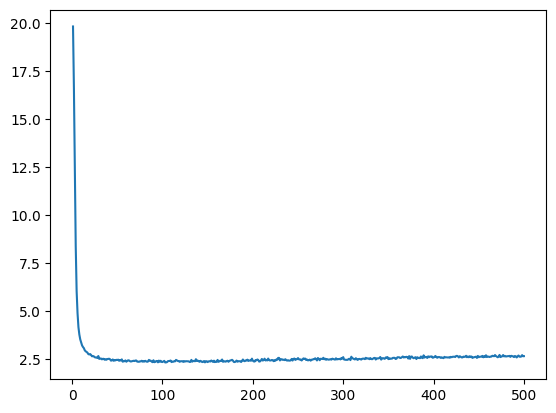

In [42]:
amh = [np.mean([x[i] for x in all_scores]) for i in range(num_epochs)]
plt.plot(range(1,len(amh)+1),amh)
plt.show()

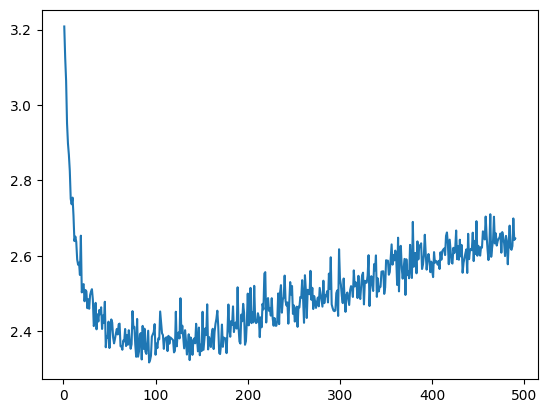

In [43]:
sam = amh[10:]
plt.plot(range(1,len(sam)+1),sam)
plt.show()

In [44]:
pred = model.predict(x_test)

4/4 [==============================] - 0s 4ms/step


In [45]:
pred[0], y_test[0]

(array([9.4437275], dtype=float32), 7.2)